In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading wine quality data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv") 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

***dataset is related to red and white variants of the Portuguese Vinho Verde wine.***

***The Data set has 1599 rows and 12 columns.***

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


***There is no null value present anywhere in the data***

***Data type of all columns except object columns is float64 and object column data type is int64.***

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11

In [8]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

***There are six type of quality present in the quality column but in 7,4,8,3 quality content less sample***

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


***count of all columns are same so there is no null value***

***I observed some skewness present in 'total sulfur dioxide' because the mean value of 'total sulfur dioxide' is greater than 50%. And there is lot of difference between 75 percentile and max.***

***There is also difference between 75 percetile and max in the 'free sulfur dioxide' column so there is a possibility of outlier here.***

***'residual sugar' column also have lot of outlier because there is also difference between 75% and max***

***like wise 'sulphates' also has outlier***

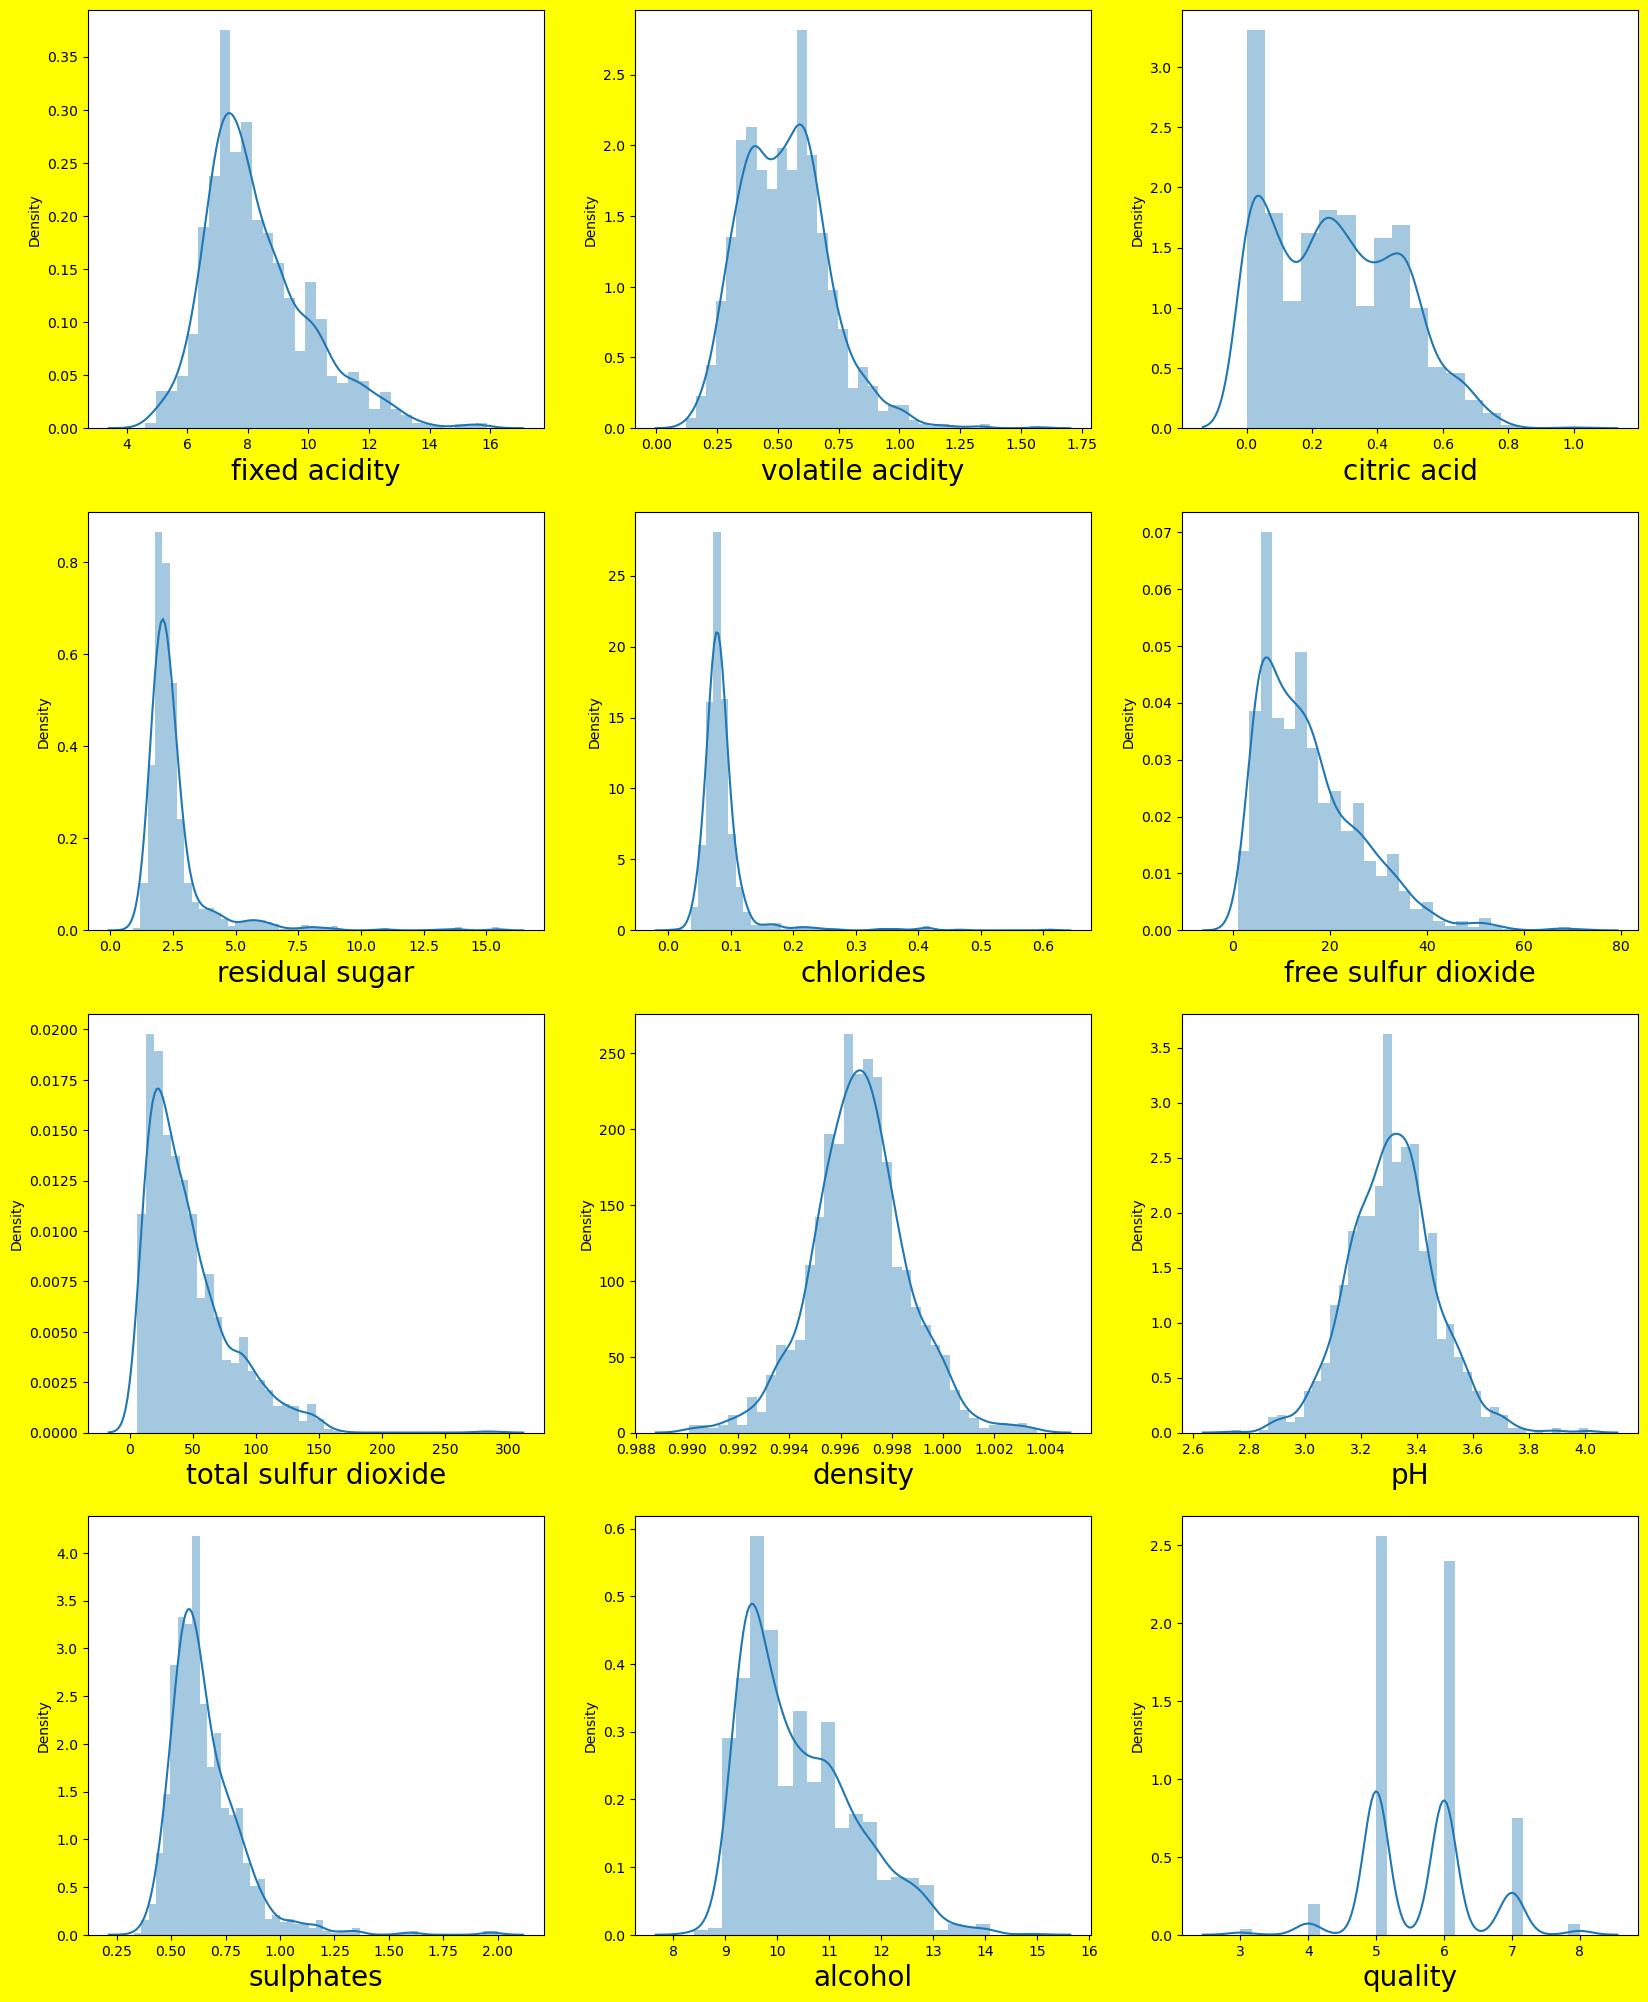

In [10]:
plt.figure(figsize=(20,25), facecolor='yellow') 
plotnumber= 1

for column in data:
    if plotnumber<=12:        
        ax = plt.subplot(4,3,plotnumber) 
        sns.distplot(data[column]) 
        plt.xlabel(column, fontsize=20)



    plotnumber+=1
plt.show()

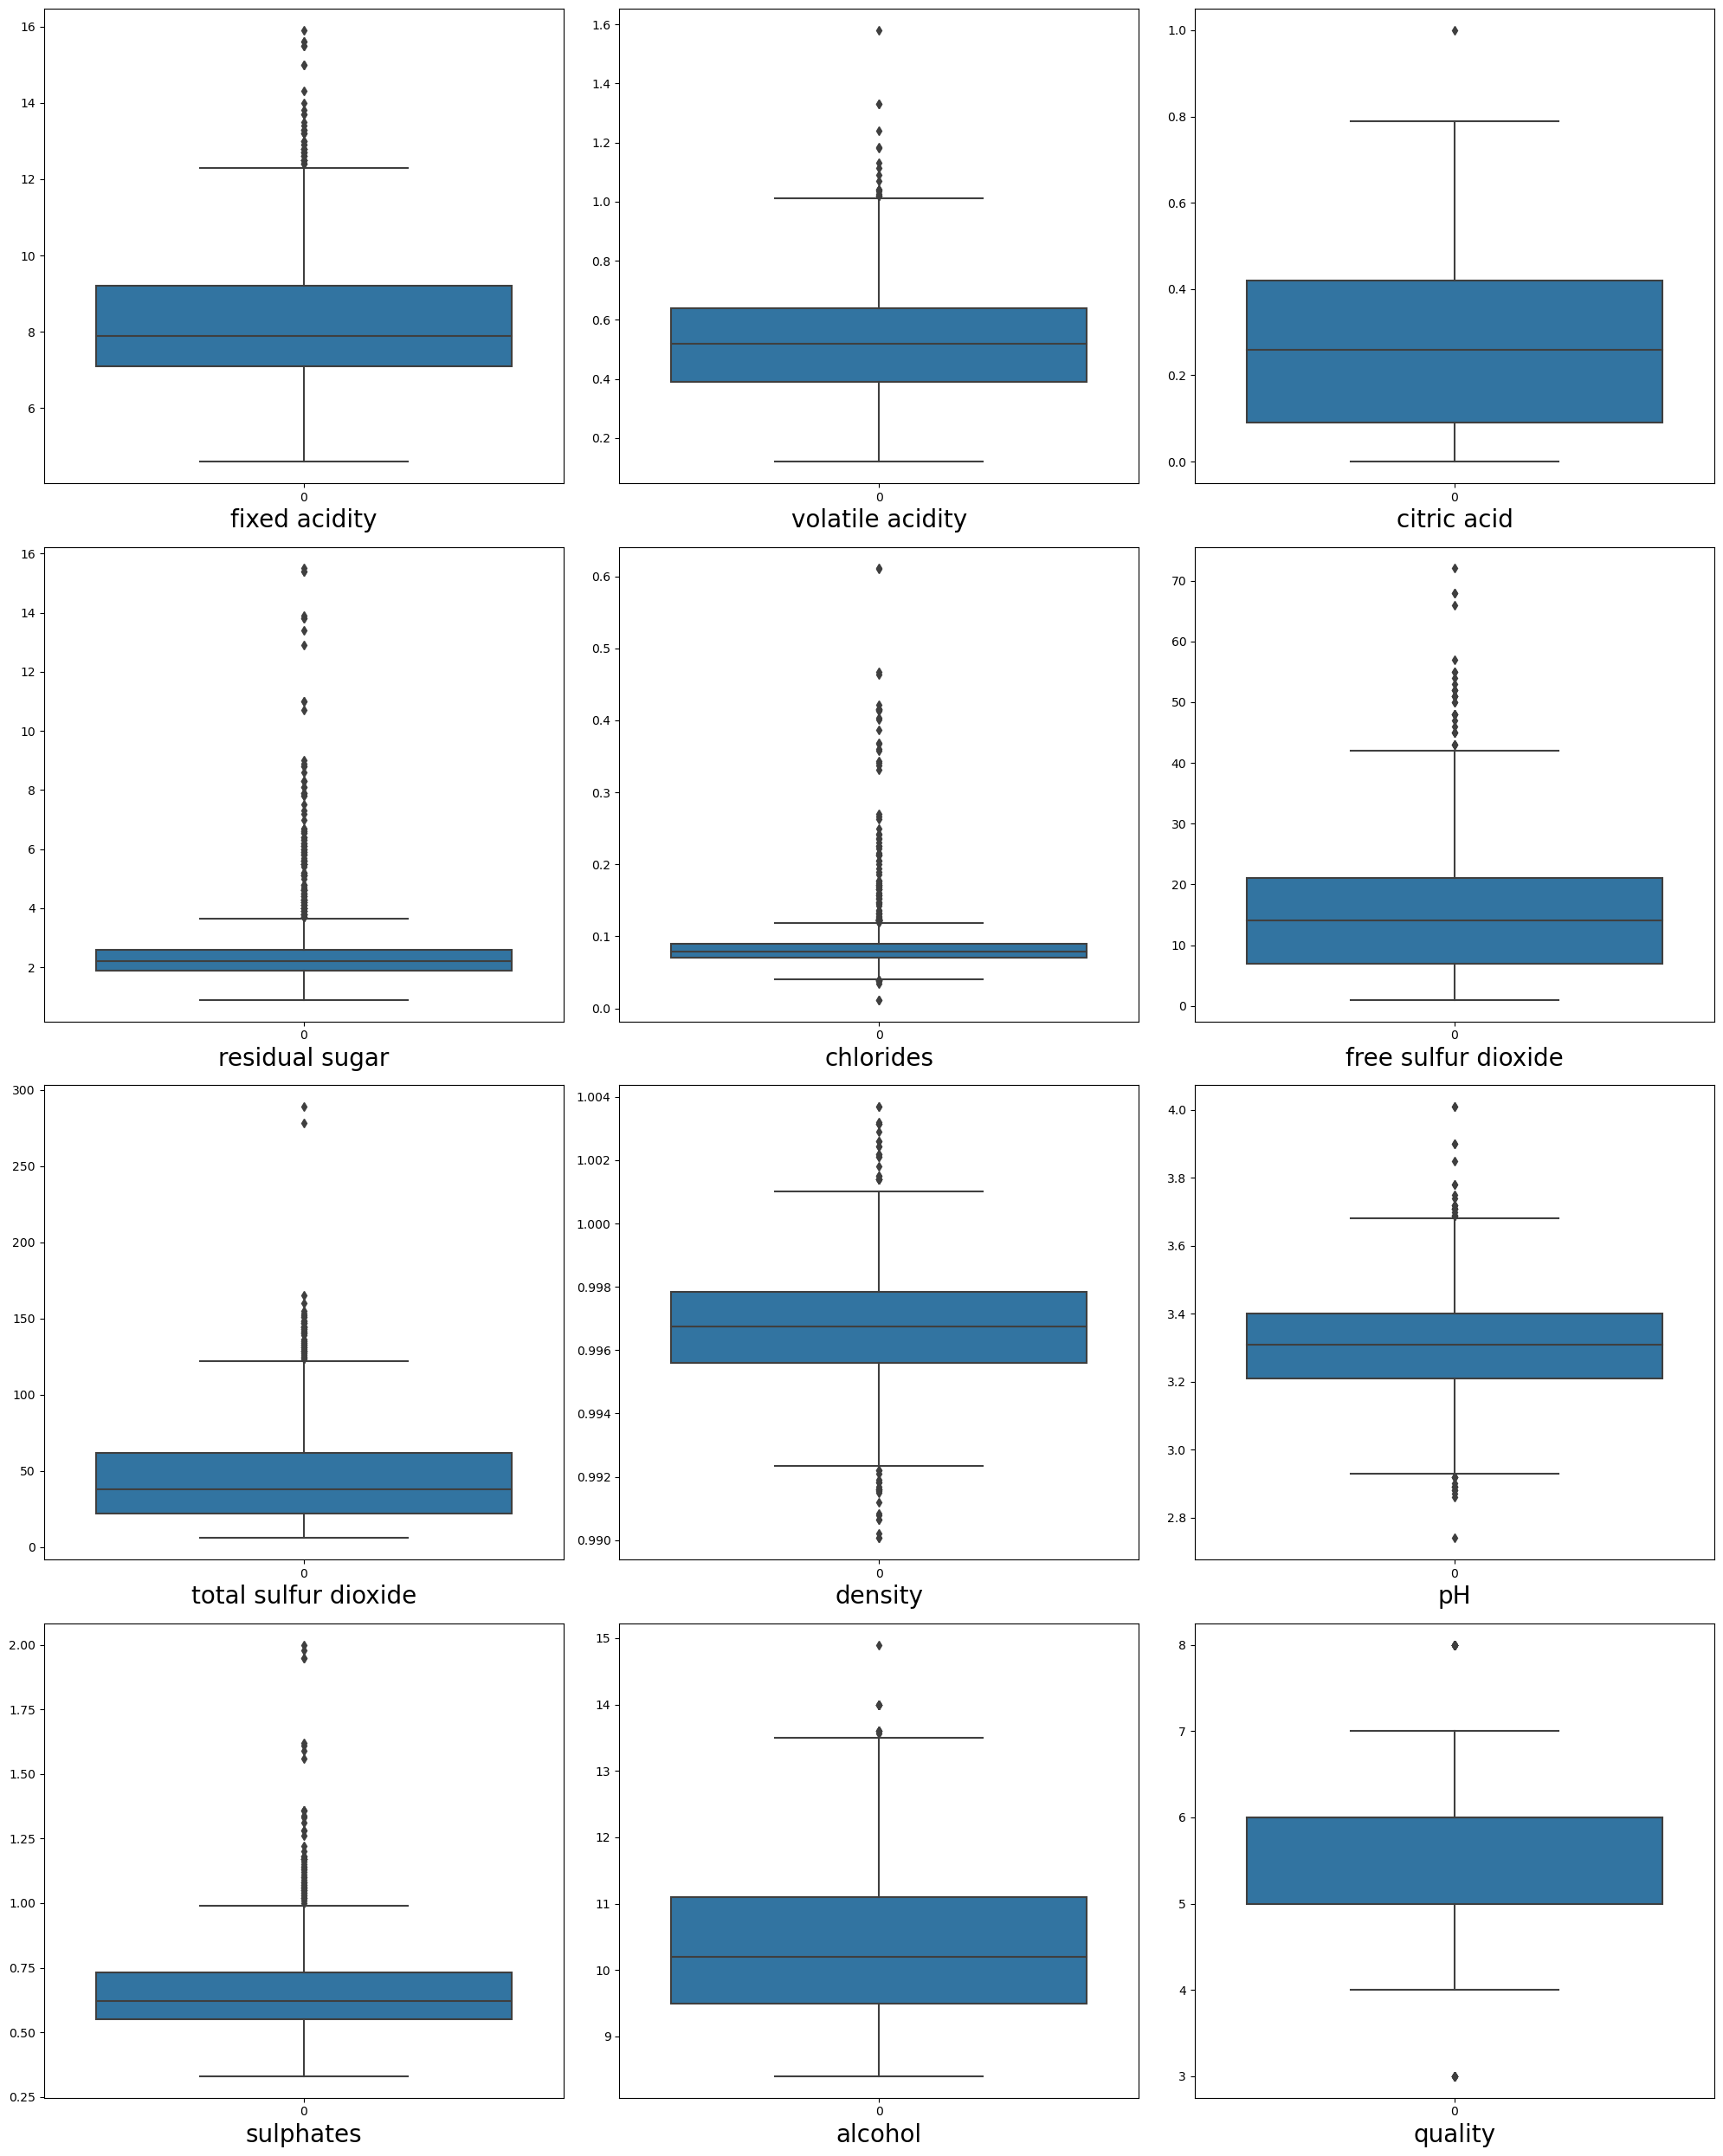

In [11]:
plt.figure(figsize=(20, 25))
graph = 1
for column in data.columns:
    if graph <= 12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data=data[column])  
        plt.xlabel(column, fontsize=20)
    graph += 1


plt.tight_layout()
plt.show()


***•fixed acidity, • volatile acidity, •residual sugar,  •chlorides,  •free sulfur dioxide, •total sulfur dioxide,  •sulphates,  •alcohol has higher side outlier***

In [12]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

***residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates these are the High skeweed data.***

***fixed acidity, volatile acidity, alcohol these are the Moderate skeweed data***

***remaining are the low skeweed data***

In [13]:
data_copy = data.copy(deep = True)   

In [14]:
#Find the IQR to identify outliers

# 1st quantile
q1 = data_copy.quantile(0.25)

#3rd quantile 
q3 = data_copy.quantile(0.75)

#IQR
iqr = q3 - q1

In [15]:
df = pd.DataFrame({'q1':q1,'q3':q3,'iqr':iqr})
df

,q1,q3,iqr
fixed acidity,7.1000,9.200000,2.100000
volatile acidity,0.3900,0.640000,0.250000
citric acid,0.0900,0.420000,0.330000
residual sugar,1.9000,2.600000,0.700000
chlorides,0.0700,0.090000,0.020000
free sulfur dioxide,7.0000,21.000000,14.000000
total sulfur dioxide,22.0000,62.000000,40.000000
density,0.9956,0.997835,0.002235
pH,3.2100,3.400000,0.190000
sulphates,0.5500,0.730000,0.180000


## Outlier detection formula

***higher side ==> Q3 + (1.5 * IQR)***

***lower side ==> Q1 - (1.5 IQR)***

In [16]:
fa_high = (q3['fixed acidity'] + (1.5* iqr['fixed acidity']))
print(fa_high)

fa_index= np.where(data_copy['fixed acidity']> fa_high) 
print (fa_index)

data_copy = data_copy.drop(data_copy.index[fa_index])
print (data_copy.shape ) 

data_copy.reset_index()

12.349999999999998
(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
        359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
        442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
        555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
        652,  680,  811,  814, 1224], dtype=int64),)
(1550, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
va_high = (q3['volatile acidity'] + (1.5* iqr['volatile acidity']))
print(va_high)

va_index= np.where(data_copy['volatile acidity']> va_high) 
print (va_index)

data_copy = data_copy.drop(data_copy.index[va_index])
print (data_copy.shape ) 

data_copy.reset_index()

1.0150000000000001
(array([  38,   94,  120,  126,  127,  134,  199,  521,  627,  644,  654,
        659,  664,  678,  851, 1212, 1250, 1263, 1418], dtype=int64),)
(1531, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
rs_high = (q3['residual sugar'] + (1.5* iqr['residual sugar']))
print(rs_high)

rs_index= np.where(data_copy['residual sugar']> rs_high) 
print (rs_index)

data_copy = data_copy.drop(data_copy.index[rs_index])
print (data_copy.shape ) 

data_copy.reset_index()

3.6500000000000004
(array([   9,   11,   14,   15,   18,   33,   35,   38,   39,   54,   56,
         63,   64,  148,  149,  150,  151,  157,  158,  186,  206,  257,
        258,  259,  260,  262,  263,  265,  266,  267,  271,  311,  312,
        314,  352,  355,  369,  370,  374,  382,  386,  388,  424,  447,
        451,  461,  468,  469,  480,  502,  504,  514,  515,  548,  555,
        557,  572,  573,  593,  597,  606,  660,  680,  740,  816,  822,
        827,  840,  841,  847,  848,  850,  854,  860,  878,  881,  883,
        911,  969,  975,  980,  993,  994,  996, 1008, 1011, 1014, 1015,
       1016, 1018, 1023, 1031, 1033, 1051, 1070, 1075, 1084, 1113, 1123,
       1127, 1140, 1162, 1171, 1175, 1180, 1193, 1211, 1223, 1224, 1230,
       1231, 1241, 1264, 1291, 1306, 1321, 1327, 1339, 1345, 1356, 1367,
       1368, 1370, 1374, 1378, 1403, 1406, 1408, 1410, 1433, 1446, 1447,
       1472, 1484, 1490, 1506, 1509, 1521], dtype=int64),)
(1393, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1389,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1390,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1391,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
chl_high = (q3['chlorides'] + (1.5* iqr['chlorides']))
print(chl_high)

chl_index= np.where(data_copy['chlorides']> chl_high) 
print (chl_index)

data_copy = data_copy.drop(data_copy.index[chl_index])
print (data_copy.shape ) 

data_copy.reset_index()

0.11999999999999998
(array([  13,   14,   32,   67,   69,   91,   94,  109,  128,  132,  144,
        156,  196,  210,  226,  239,  248,  259,  263,  264,  280,  282,
        283,  287,  312,  349,  374,  378,  405,  406,  429,  432,  459,
        466,  467,  468,  506,  510,  528,  552,  573,  575,  608,  631,
        650,  651,  653,  654,  657,  672,  673,  684,  706,  707,  755,
        781,  818,  873,  879,  880,  907,  942,  953,  987, 1005, 1028,
       1030, 1043, 1056, 1057, 1083, 1088, 1089, 1090, 1140, 1154, 1189,
       1190, 1191, 1192, 1247, 1367], dtype=int64),)
(1311, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [20]:
fsd_high = (q3['free sulfur dioxide'] + (1.5* iqr['free sulfur dioxide']))
print(fsd_high)

fsd_index= np.where(data_copy['free sulfur dioxide']> fsd_high) 
print (fsd_index)

data_copy = data_copy.drop(data_copy.index[fsd_index])
print (data_copy.shape ) 

data_copy.reset_index()

42.0
(array([ 388,  405,  448,  486,  523,  732,  733,  784,  865,  911,  930,
        932,  950,  985,  995, 1016], dtype=int64),)
(1295, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1291,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1292,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1293,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
tsd_high = (q3['total sulfur dioxide'] + (1.5* iqr['total sulfur dioxide']))
print(tsd_high)

tsd_index= np.where(data_copy['total sulfur dioxide']> tsd_high) 
print (tsd_index)

data_copy = data_copy.drop(data_copy.index[tsd_index])
print (data_copy.shape ) 

data_copy.reset_index()

122.0
(array([  67,   69,   71,   72,   73,  104,  118,  151,  152,  153,  162,
        177,  249,  278,  323,  361,  404,  452,  484,  485,  496,  523,
        530,  555,  570,  599,  600,  614, 1120, 1121, 1137, 1199, 1202,
       1259, 1260, 1261], dtype=int64),)
(1259, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1255,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1256,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1257,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [22]:
sul_high = (q3['sulphates'] + (1.5* iqr['sulphates']))
print(sul_high)

sul_index= np.where(data_copy['sulphates']> sul_high) 
print (sul_index)

data_copy = data_copy.drop(data_copy.index[sul_index])
print (data_copy.shape ) 

data_copy.reset_index()

0.9999999999999999
(array([  11,   30,   62,  121,  253,  274,  277,  279,  280,  357,  375,
        376,  378,  430,  466,  639,  894, 1066, 1093, 1097], dtype=int64),)
(1239, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1235,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1236,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1237,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
alc_high = (q3['alcohol'] + (1.5* iqr['alcohol']))
print(alc_high)

alc_index= np.where(data_copy['alcohol']> alc_high) 
print (alc_index)

data_copy = data_copy.drop(data_copy.index[alc_index])
print (data_copy.shape ) 

data_copy.reset_index()

13.5
(array([ 106,  108,  340,  418,  595,  858,  933,  963,  964, 1132, 1133],
      dtype=int64),)
(1228, 12)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1224,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1225,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1226,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


***Outliers have been removed so now we will check the skewness***

In [24]:
data_copy.skew()

fixed acidity           0.672498
volatile acidity        0.279636
citric acid             0.315680
residual sugar          0.563554
chlorides              -0.014483
free sulfur dioxide     0.847433
total sulfur dioxide    0.985748
density                -0.156486
pH                      0.332176
sulphates               0.613099
alcohol                 0.767656
quality                 0.324560
dtype: float64

***After removing outlier skewness is left only in fixed acidity, residual sugar,free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns.***

In [26]:
data_copy['fixed acidity'] = np.cbrt(data_copy['fixed acidity'])
data_copy['residual sugar'] = np.cbrt(data_copy['residual sugar'])
data_copy['free sulfur dioxide'] = np.cbrt(data_copy['free sulfur dioxide'])
data_copy['total sulfur dioxide'] = np.cbrt(data_copy['total sulfur dioxide'])
data_copy['sulphates'] = np.cbrt(data_copy['sulphates'])
data_copy['alcohol'] = np.cbrt(data_copy['alcohol'])

In [27]:
data_copy.skew()

fixed acidity           0.385786
volatile acidity        0.279636
citric acid             0.315680
residual sugar          0.130883
chlorides              -0.014483
free sulfur dioxide     0.102836
total sulfur dioxide    0.223726
density                -0.156486
pH                      0.332176
sulphates               0.309127
alcohol                 0.662556
quality                 0.324560
dtype: float64

***Almost skewness has been removed from this data, So I will do next step***

### checking correlation

In [28]:
corr_data = data_copy.corr()

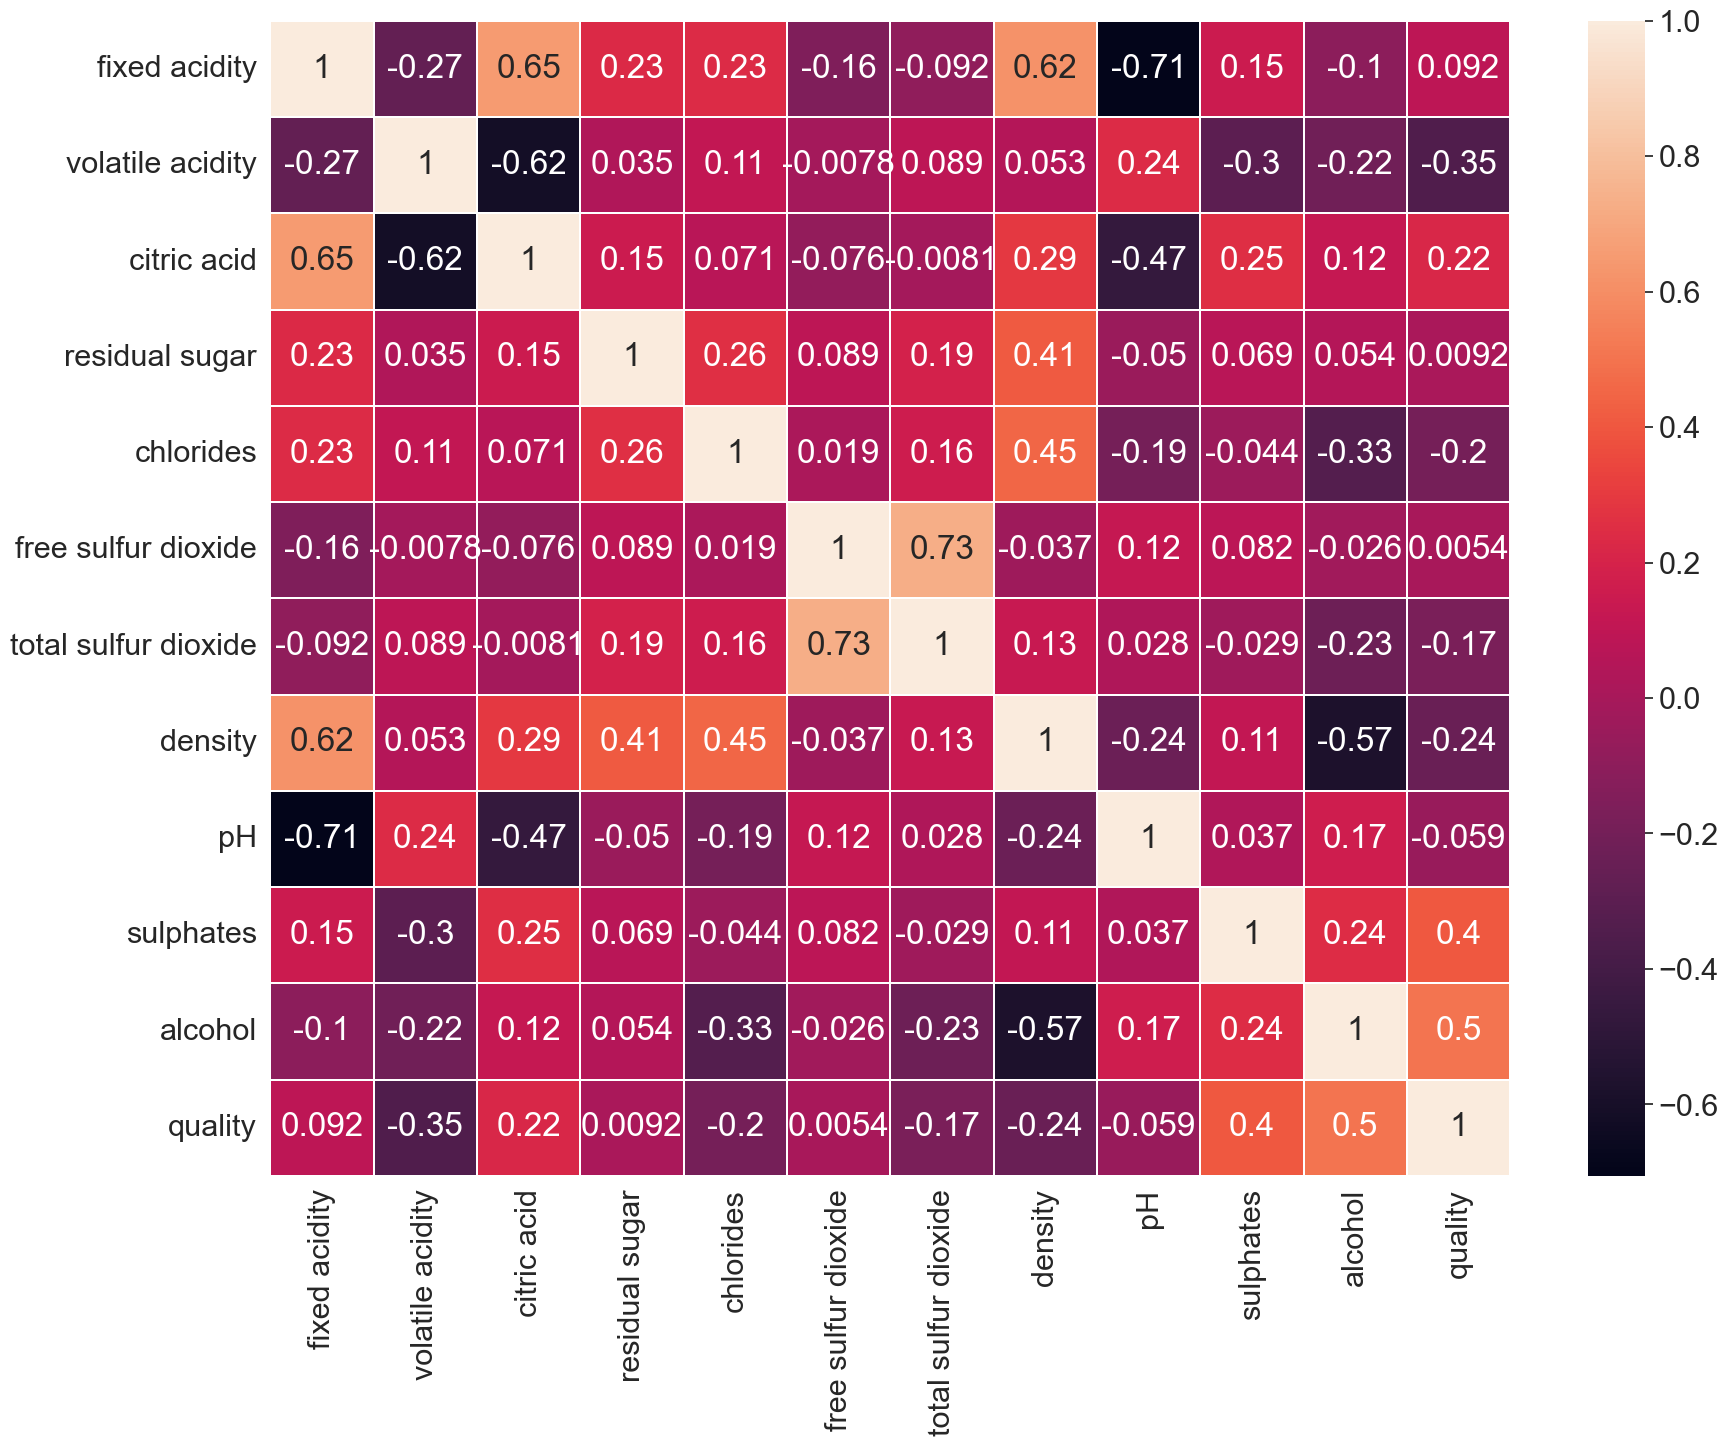

In [29]:
plt.figure(figsize = (20,15))
sns.set(font_scale = 2)
sns.heatmap(data_copy.corr(),linewidths=0.2, annot = True)
plt.show()

In [30]:
corr_data['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.504437
sulphates               0.404660
citric acid             0.215982
fixed acidity           0.091709
residual sugar          0.009174
free sulfur dioxide     0.005391
pH                     -0.058721
total sulfur dioxide   -0.172917
chlorides              -0.198851
density                -0.244520
volatile acidity       -0.347257
Name: quality, dtype: float64

***alcohol, sulphates are moderate and positive correlated with dependent variable***
***and citric acid, fixed acidity, free sulfur dioxide and residual sugar are low and positive correlated with dependent variable***

***pH, total sulfur dioxide, chlorides ,density and volatile acidity negatively correlated with dependent variable***

***but almost zero relationship has been found with the dependent variable of free sulfur dioxide, residual sugar, pH.***

***and I found multicollinearity issue in free sulfur dioxide and total sulfur dioxide which is -o.73***

In [31]:
## Dividing dependent and independent variable
x = data_copy.drop('quality',axis = 1)
y = data_copy['quality']


In [32]:
## After dividing variable I scaled independent variable to normalizes the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)


### variance_inflation_factor

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
## detect the
vif = pd.DataFrame()   

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    

vif

,vif,Features
0,7.162671,fixed acidity
1,1.962994,volatile acidity
2,3.000608,citric acid
3,1.691772,residual sugar
4,1.352624,chlorides
5,2.415054,free sulfur dioxide
6,2.668300,total sulfur dioxide
7,7.160516,density
8,3.415183,pH
9,1.326046,sulphates


***After checking vif values, I found the problem of multicollinearity in the columns of fixed acidity and density. The vif value in these columns is greater than 5 so i will drop 1 column which has higher vif value.***

In [35]:
# Droping density column
x.drop('fixed acidity',axis = 1, inplace = True)

In [36]:
scalar = StandardScaler() 
x_scaled = scalar.fit_transform(x)

In [37]:
vif = pd.DataFrame()   #empt DataFrame bnayege

vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]  

vif["Features"] = x.columns    # add one mor colum to keep the columns name as a features

#Let's check the values

vif

,vif,Features
0,1.958283,volatile acidity
1,2.729865,citric acid
2,1.593117,residual sugar
3,1.331394,chlorides
4,2.398741,free sulfur dioxide
5,2.599243,total sulfur dioxide
6,3.291671,density
7,1.445184,pH
8,1.314447,sulphates
9,2.705203,alcohol


***Now data lookb like better***

### Data imbalance problem

In [38]:
y.value_counts()

5    521
6    516
7    142
4     34
8     12
3      3
Name: quality, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


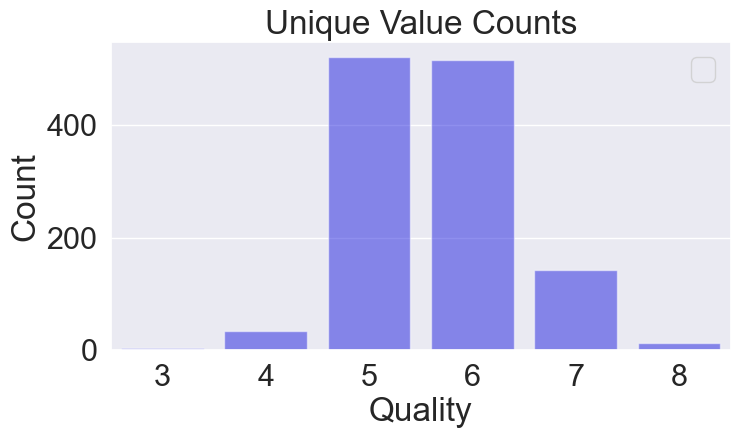

In [39]:
fig, ax = plt.subplots(figsize=(8, 4))
value_counts = y.value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='blue', alpha=0.5)
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
ax.set_title('Unique Value Counts')

ax.legend()

plt.show()


***There is the class imbalance problem*** 

In [40]:
# Oversampling the data
!pip install imblearn


In [41]:
from imblearn.over_sampling import RandomOverSampler
d = {5:521,6:516,7:300,4:200,8:150,3:150}
ros = RandomOverSampler(sampling_strategy=d, random_state=45)
x_resampled, y_resampled = ros.fit_resample(x_scaled, y)


In [42]:
y.value_counts()

5    521
6    516
7    142
4     34
8     12
3      3
Name: quality, dtype: int64

In [43]:
y_resampled.value_counts()

5    521
6    516
7    300
4    200
8    150
3    150
Name: quality, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


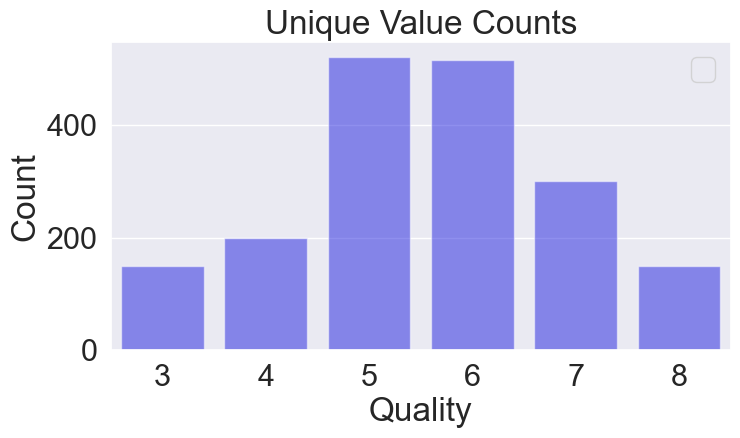

In [44]:
fig, ax = plt.subplots(figsize=(8, 4))
value_counts = y_resampled.value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color='blue', alpha=0.5)
ax.set_xlabel('Quality')
ax.set_ylabel('Count')
ax.set_title('Unique Value Counts')

ax.legend()

plt.show()


***now class imbalance problem is solved***

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size = 0.25, random_state= 41)

In [50]:
# Write a function and call as many as time to check accuracy_score of different models
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print("\n========================Train Result======================\n")
        print(f"Accuracy Score:  {accuracy_score(y_train, y_pred) * 100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        print("\n========================Test Result==========================")
        print(f"Accuracy Score:  {accuracy_score(y_test, pred) * 100:.2f}%")
        print('\n \n Test Classifiction Report \n', classification_report(y_test, pred,digits=2))

## DecisionTreeClassifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Training and initiation name to modal
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report


In [54]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True)        #This is for training score 
metric_score(clf,x_train,x_test,y_train,y_test, train=False)       #This is fore testing score


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  78.26%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        36
           4       0.84      1.00      0.92        54
           5       0.68      0.68      0.68       116
           6       0.69      0.59      0.64       130
           7       0.78      0.87      0.82        75
           8       0.98      1.00      0.99        49

    accuracy                           0.78       460
   macro avg       0.83      0.86      0.84       460
weighted avg       0.78      0.78      0.78       460



## RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier 

In [56]:
# Training and initiation name to modal
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
# Call the function and pass dataset to check train and test score
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)        #This is for training score 
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)       #This is fore testing score


========================Train Result======================

Accuracy Score:  100.00%

========================Test Result==========================
Accuracy Score:  85.00%

 
 Test Classifiction Report 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        36
           4       0.95      1.00      0.97        54
           5       0.74      0.80      0.77       116
           6       0.79      0.70      0.74       130
           7       0.88      0.91      0.89        75
           8       1.00      1.00      1.00        49

    accuracy                           0.85       460
   macro avg       0.89      0.90      0.90       460
weighted avg       0.85      0.85      0.85       460



## Cross Validation

***Cross Validation score to check if the model is overfitting***

In [58]:
from sklearn.model_selection import cross_val_score

#### RandomForestClassifier

In [59]:
cross_val_scores = cross_val_score(rfc, x_scaled, y, cv=5, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)


Mean Cross-Validation Accuracy: 0.5692251534760245


In [61]:
cross_val_scores = cross_val_score(rfc, x_scaled, y, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.5879276588684255


#### DecisionTreeClassifier

In [62]:

cross_val_scores = cross_val_score(clf, x_scaled, y, cv=80, scoring='accuracy')
mean_accuracy = np.mean(cross_val_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

Mean Cross-Validation Accuracy: 0.5433333333333333


***I select RandomForestClassifier model because its accuracy better then DecisionTreeClassifier***

In [63]:
import pickle

In [65]:
pickle.dump(rfc,open('wine_quality','wb'))